In [49]:
using Plots, SparseArrays, Revise
includet("nonuniformMultiGrid.jl")
includet("constructions2D.jl")
includet("grid_constructions1D.jl")
includet("grid_constructions2D.jl")
includet("linespacecs.jl")

In [51]:
n = 2^7
grid,m = linspacecs(0,1,n+1,pi/6)
f = pointsource_half2D(2*n);
σ = float(-10)
sigmas = spdiagm(-σ*ones(length(grid)^2))
H = helmholtz2D(grid,sigmas);

In [52]:
sol = H \ f;

In [57]:
# function nonUniformVcycle2D(; grid, A, f, u, nu1, nu2, recursion_depth)
u = zeros(ComplexF64, length(f))
for _ in 1:20
    u = nonUniformVcycle2D(
        grid=grid,
        A=H,
        f=f,
        u=u,
        nu1=3,
        nu2=3,
        recursion_depth=6)
end


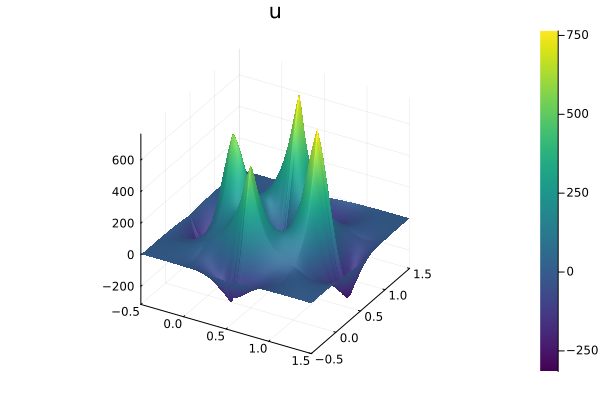

In [58]:
x = y = range(-0.5, stop=1.5, length=2n-1)
z = reshape(real(u), 2n-1, 2n-1)

surface(x, y, z, color=:viridis, title="u")

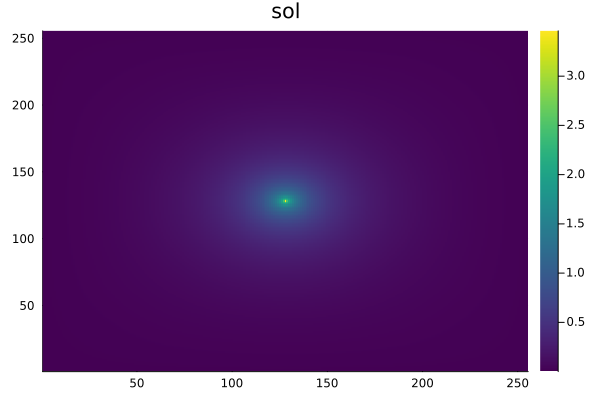

In [60]:
x = y = range(-0.5, stop=1.5, length=2n-1)
z = reshape(real(sol), 2n-1, 2n-1)

surface(x, y, z, color=:viridis, title="sol")
heatmap(z, color=:viridis, title="sol")